<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Grid Search Lab

---


Now we want to use grid search on the wine dataset to tune a linear regression model including regularisation parameters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import patsy

###  Load the wine dataset

In [3]:
# Load dataset
df = pd.read_csv("winequality_merged.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Clean the column names by replacing spaces by underscore

In [4]:
df.columns = [col.replace(" ", "_").lower() for col in df.columns]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Create Feature Matrix and target

In [7]:
y = df['quality']
X = df.drop('quality', axis=1)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


### Use the standard scaler to rescale the feature matrix

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled,columns=X.columns)

### Setup search parameters for grid search on the regularisation strength alpha

Hint: Look up `np.linspace` and `np.logspace` for efficient ways of defining search parameters for alpha.

In [9]:
search_parameters = {
    "alpha": np.linspace(10**(-10), 0.25, 200)
}

### Perform grid search using Lasso regularisation 

In [10]:
lasso = Lasso()

estimator = GridSearchCV(lasso, search_parameters)
results = estimator.fit(X, y)

### Obtain performance metrics and decide on an optimal parameter for alpha

In [11]:
print( "Best estimator:")
print( results.best_estimator_)

print()

print( "Best score:")
print( results.best_score_)

print()

print( "Best params:")
print( results.best_params_)

#print 

#print "Grid parameters"
#print results.param_grid

print()
df_score = pd.DataFrame(results.cv_results_)
df_score.sort_values(by='rank_test_score').head()

Best estimator:
Lasso(alpha=0.061557789020100506, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Best score:
0.2380017772500197

Best params:
{'alpha': 0.061557789020100506}



/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/juan/.envs/DAT21/lib/py

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
49,0.001590,0.000470,0.238002,0.256267,0.0615578,{'alpha': 0.061557789020100506},1,0.274024,0.237701,0.207221,0.276380,0.232758,0.254720,0.000050,0.000087,0.027525,0.015829
50,0.001757,0.000407,0.237963,0.255324,0.0628141,{'alpha': 0.06281407042663316},2,0.274775,0.236178,0.206623,0.275716,0.232488,0.254079,0.000341,0.000028,0.028093,0.016166
48,0.002037,0.000478,0.237951,0.257192,0.0603015,{'alpha': 0.06030150761356785},3,0.273021,0.239196,0.207811,0.277030,0.233017,0.255349,0.000482,0.000132,0.026852,0.015501
51,0.001875,0.000567,0.237835,0.254361,0.0640704,{'alpha': 0.06407035183316583},4,0.275278,0.234621,0.206018,0.275039,0.232207,0.253424,0.000381,0.000139,0.028556,0.016514
47,0.001669,0.000363,0.237810,0.258097,0.0590452,{'alpha': 0.05904522620703518},5,0.271769,0.240660,0.208394,0.277667,0.233265,0.255964,0.000284,0.000038,0.026074,0.015183


### Plot the model scores obtained for the different alphas

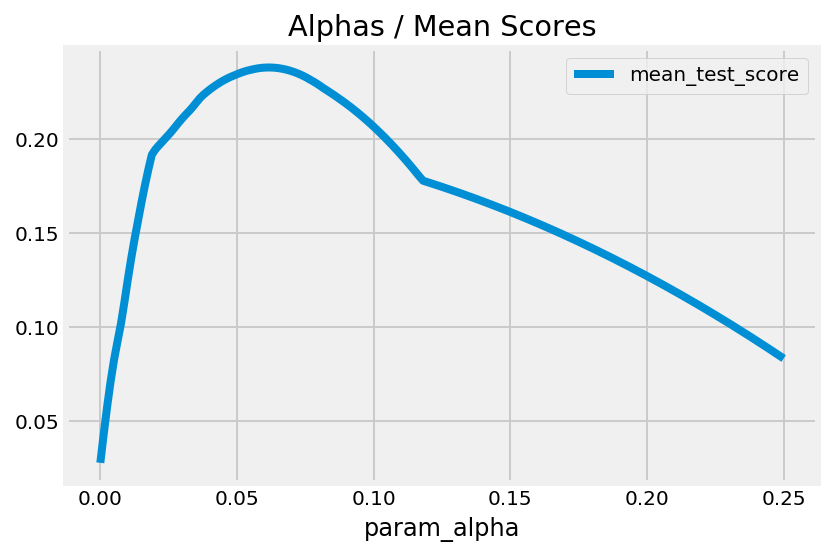

In [12]:
df_score.plot(x="param_alpha", y="mean_test_score", title="Alphas / Mean Scores")
plt.show()

### Fit a Lasso regression model on your features and target for all alpha values you used in your grid search and plot how the model coefficients change with alpha.

In [13]:
def coefs_list(df_score):
    coefs = []

    for alpha in df_score.param_alpha:

        # Initialize Lasso model with alpha parameter
        lasso = Lasso(alpha=alpha)
        model = lasso.fit(X, y)

        # Append coeficients to new object for later review
        alpha_coefs = {key: value for key, value in zip(X.columns, model.coef_.tolist())}
        alpha_coefs.update({"alpha": alpha}) # include alpha in list

        coefs.append(alpha_coefs)

    return coefs

In [14]:
print( "Best Alpha was: ", results.best_params_)
df_coef = pd.DataFrame(coefs_list(df_score))
df_coef['alpha'] = df_coef['alpha'].round(3)
df_coef.set_index('alpha',inplace=True)
df_coef

Best Alpha was:  {'alpha': 0.061557789020100506}


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,red_wine,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
alpha,,,,,,,,,,,,
0.000,0.265560,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
0.001,0.287307,-0.026641,-0.006806,-0.256941,0.087401,0.085950,0.067147,0.137106,0.260823,0.102803,-0.079405,-0.243707
0.003,0.308841,-0.026734,-0.004509,-0.202835,0.064734,0.084253,0.054223,0.118726,0.224937,0.098241,-0.079491,-0.241707
0.004,0.330376,-0.026826,-0.002212,-0.148728,0.042068,0.082556,0.041300,0.100346,0.189051,0.093679,-0.079577,-0.239707
0.005,0.351391,-0.026847,-0.000000,-0.095926,0.019965,0.080797,0.028666,0.082344,0.154010,0.089188,-0.079536,-0.237690
0.006,0.372104,-0.026441,-0.000000,-0.044492,0.000000,0.079035,0.016474,0.064036,0.119898,0.084879,-0.079100,-0.236403
0.008,0.378526,-0.024749,-0.000000,-0.026814,0.000000,0.077021,0.014762,0.050499,0.106287,0.082140,-0.077300,-0.233065
0.009,0.384953,-0.023057,-0.000000,-0.009122,-0.000000,0.075011,0.013050,0.036949,0.092666,0.079402,-0.075505,-0.229725
0.010,0.387600,-0.021208,-0.000000,-0.000000,-0.000000,0.072222,0.011667,0.028238,0.084150,0.077509,-0.072745,-0.226576


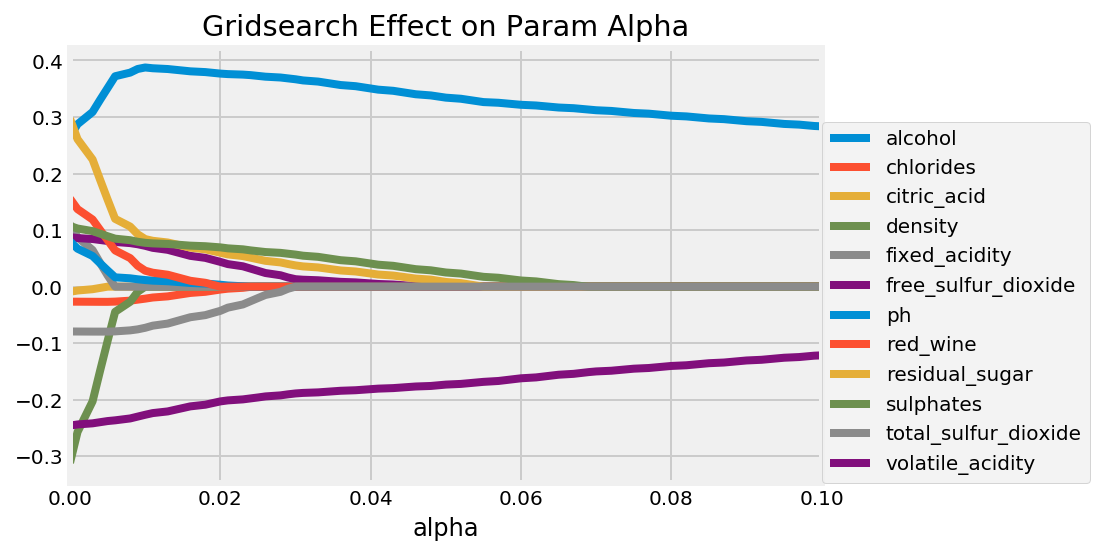

In [15]:
df_coef.plot(title="Gridsearch Effect on Param Alpha")
plt.legend(loc=[1,0])
plt.xlim([0,0.1])
plt.show()

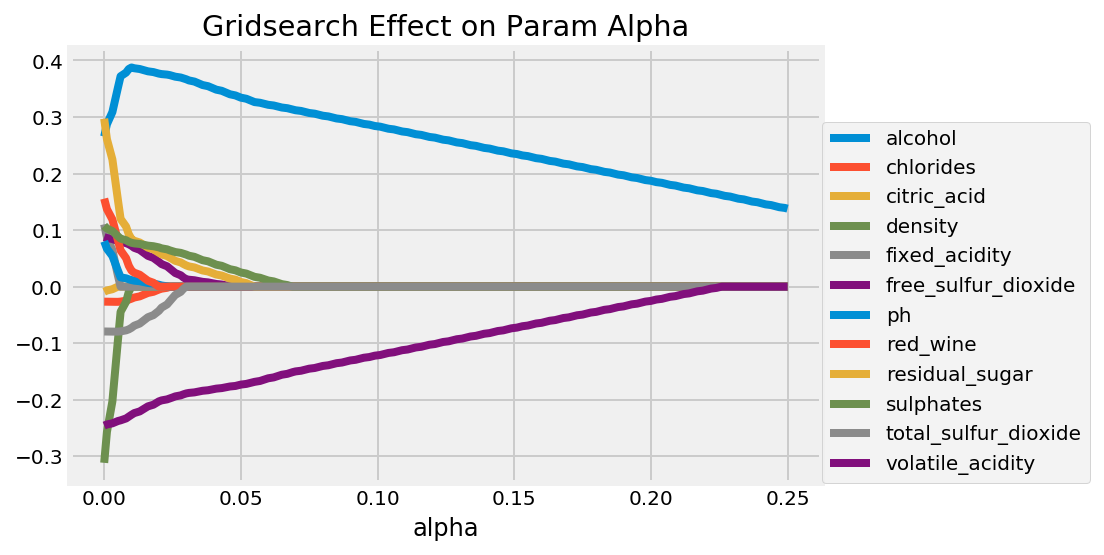

In [16]:
df_coef.plot(title="Gridsearch Effect on Param Alpha")
plt.legend(loc=[1,0])
plt.show()

### Bonus: Ridge regression

Do the same using ridge regression adjusting the grid search parameters to the appropriate range. 

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge()


# Setup search parameters
search_parameters = {
#    "alpha": np.linspace(10**(-10), 0.5, 1001)
    "alpha": np.logspace(-10, 10, 101)
}

estimator = GridSearchCV(ridge, search_parameters)
results = estimator.fit(X, y)
print( "Best estimator:")
print( results.best_estimator_)

print()

print( "Best score:")
print( results.best_score_)

print()

print( "Best params:")
print( results.best_params_)

#print 

#print "Grid parameters"
#print results.param_grid

print()
df_score = pd.DataFrame(results.cv_results_)
df_score.sort_values(by='rank_test_score').head()

Best estimator:
Ridge(alpha=1584.8931924611175, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Best score:
0.22011625642837576

Best params:
{'alpha': 1584.8931924611175}



/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/juan/.envs/DAT21/lib/py

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
66,0.001883,0.000414,0.220116,0.267884,1584.89,{'alpha': 1584.8931924611175},1,0.217801,0.249962,0.211879,0.288512,0.230674,0.265177,0.000198,0.000081,0.007846,0.015854
65,0.001454,0.000388,0.214281,0.280741,1000,{'alpha': 1000.0},2,0.176905,0.265522,0.224453,0.299771,0.241499,0.276932,0.000082,0.000015,0.027333,0.014239
67,0.001477,0.000498,0.213961,0.249144,2511.89,{'alpha': 2511.886431509582},3,0.232904,0.228297,0.194902,0.271614,0.214076,0.247520,0.000095,0.000095,0.015516,0.017721
64,0.002078,0.000464,0.199560,0.288806,630.957,{'alpha': 630.9573444801943},4,0.117839,0.275674,0.233054,0.306610,0.247809,0.284135,0.000411,0.000079,0.058105,0.013055
68,0.001396,0.000345,0.195012,0.224324,3981.07,{'alpha': 3981.0717055349855},5,0.220302,0.201175,0.173809,0.248471,0.190923,0.223326,0.000127,0.000033,0.019201,0.019321


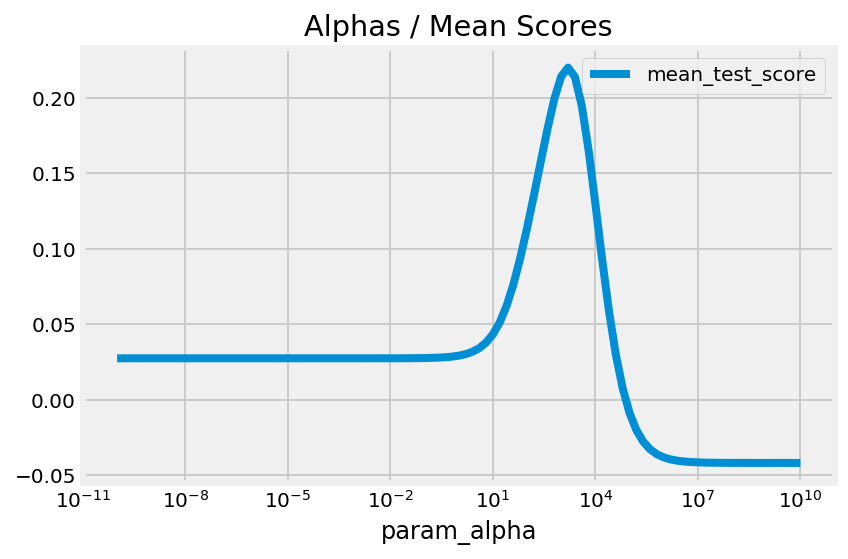

In [18]:
df_score.plot( x="param_alpha", y="mean_test_score", title="Alphas / Mean Scores")
plt.xscale('log')
plt.show()

In [19]:
print( "Best Alpha was: ", results.best_params_)
df_coef = pd.DataFrame(coefs_list(df_score))
df_coef['alpha'] = df_coef['alpha'].round(10)
df_coef.set_index('alpha',inplace=True)
df_coef.head(10)

Best Alpha was:  {'alpha': 1584.8931924611175}


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,red_wine,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
alpha,,,,,,,,,,,,
1.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
2.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
3.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
4.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
6.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
1.000000e-09,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
1.600000e-09,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
2.500000e-09,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
4.000000e-09,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685


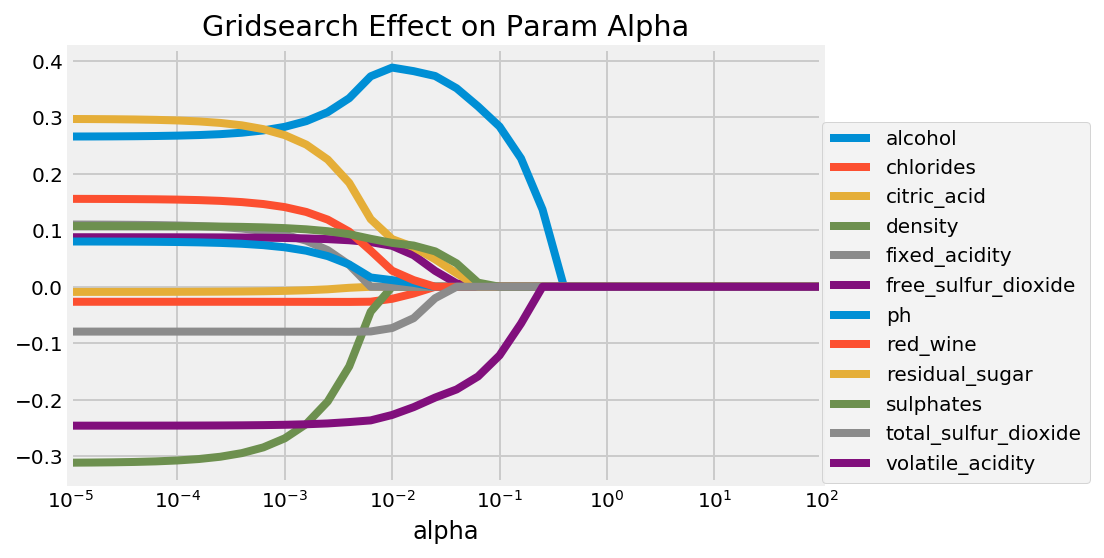

In [20]:
df_coef.plot(title="Gridsearch Effect on Param Alpha")
plt.xscale('log')
plt.xlim([10**(-5),10**(2)])
plt.legend(loc=[1,0])
plt.show()

## Bonus: Elastic Net regression

Do the same using elasticnet adjusting the grid search parameters to the appropriate range. 

In [21]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()


# Setup search parameters
search_parameters = {
#    "alpha": np.linspace(10**(-10), 0.5, 1001)
    "alpha": np.logspace(-10, 10, 101)
}

estimator = GridSearchCV(elastic, search_parameters)
results = estimator.fit(X, y)
print( "Best estimator:")
print( results.best_estimator_)

print()

print( "Best score:")
print( results.best_score_)

print()

print( "Best params:")
print( results.best_params_)

#print 

#print "Grid parameters"
#print results.param_grid

print 
df_score = pd.DataFrame(results.cv_results_)
df_score.sort_values(by='rank_test_score').head()

Best estimator:
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Best score:
0.2368487636561871

Best params:
{'alpha': 0.1}


/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/juan/.envs/DAT21/lib/py

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
45,0.001322,0.000322,0.236849,0.258599,0.1,{'alpha': 0.1},1,0.268815,0.241020,0.208077,0.278210,0.233652,0.256568,0.000083,0.000011,0.024901,0.015251
44,0.001727,0.000369,0.223002,0.273883,0.0630957,{'alpha': 0.06309573444801943},2,0.210007,0.261552,0.221255,0.291423,0.237751,0.268675,0.000368,0.000037,0.011393,0.012739
46,0.001350,0.000323,0.218024,0.232581,0.158489,{'alpha': 0.15848931924611173},3,0.240723,0.201937,0.191643,0.259862,0.221707,0.235944,0.000127,0.000009,0.020207,0.023767
43,0.002217,0.000396,0.199089,0.284350,0.0398107,{'alpha': 0.03981071705534969},4,0.123548,0.274016,0.230805,0.301307,0.242934,0.277727,0.000511,0.000026,0.053651,0.012086
47,0.001274,0.000363,0.160556,0.198674,0.251189,{'alpha': 0.25118864315095824},5,0.121986,0.161776,0.167861,0.232104,0.191835,0.202142,0.000153,0.000035,0.028979,0.028816


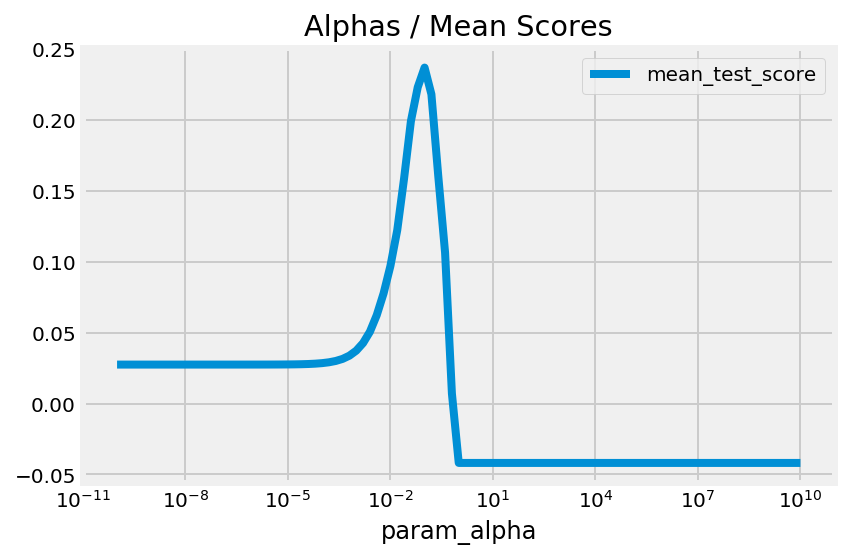

In [22]:
df_score.plot( x="param_alpha", y="mean_test_score", title="Alphas / Mean Scores")
plt.xscale('log')
plt.show()

In [23]:
print( "Best Alpha was: ", results.best_params_)
df_coef = pd.DataFrame(coefs_list(df_score))
df_coef['alpha'] = df_coef['alpha'].round(10)
df_coef.set_index('alpha',inplace=True)
df_coef.head(10)

Best Alpha was:  {'alpha': 0.1}


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,red_wine,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
alpha,,,,,,,,,,,,
1.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
2.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
3.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
4.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
6.000000e-10,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
1.000000e-09,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
1.600000e-09,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
2.500000e-09,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685
4.000000e-09,0.26556,-0.026527,-0.009099,-0.311567,0.110274,0.087623,0.080187,0.155642,0.297042,0.107392,-0.079276,-0.245685


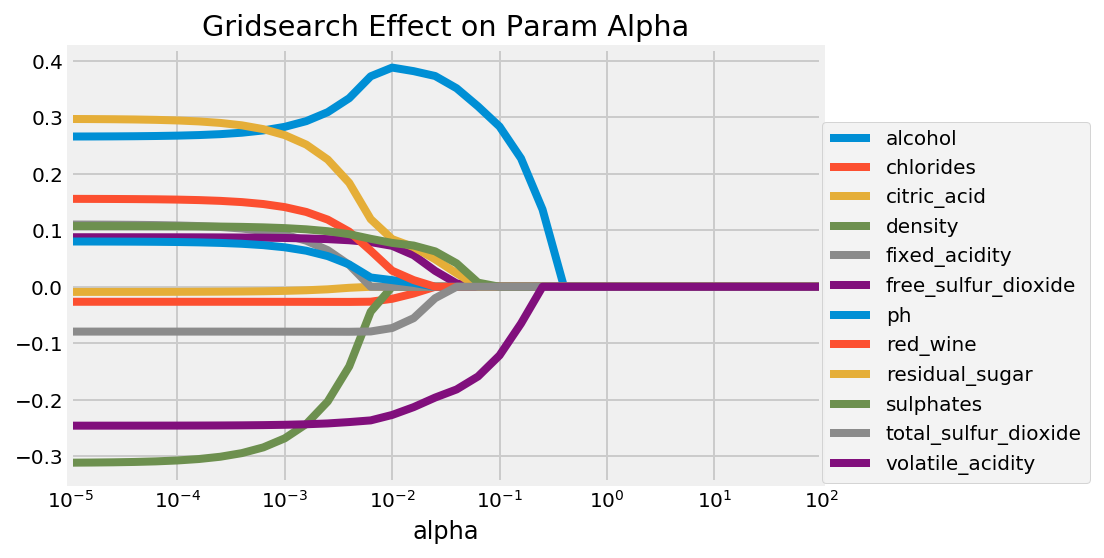

In [24]:
df_coef.plot(title="Gridsearch Effect on Param Alpha")
plt.xscale('log')
plt.xlim([10**(-5),10**(2)])
plt.legend(loc=[1,0])
plt.show()